# Pymaceuticals Inc.
---

### Observations

- Ramicane and Capomulin saw the lowest final average tumor volumes of all the drug regimens by over *20mm3*.
- Infubinol is the only drug regimen of the four selected treatments that produced a potential outlier.
- We saw a positive effect on **Mouse l509** while on the Capomulin drug regimen, with initial tumor volume at *45mm3* and ending with a tumor volume of just *41.48mm3*, which could demonstrate the effectiveness of this treatment, and similarly of Ramicane.
- Calculating the correlation and linear regression model for Average Tumor Volume and Weight results in a clearly positive correlation of 0.84. However, the data being compared is not statistically significant as evident by a p-value of close to 0. 
- A more comprehensive analysis of all average tumor volumes and drug regimens should be employed to obtain a better understanding of drug effectiveness across the data.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = mouse_metadata.merge(study_results, on = "Mouse ID")

# Display the data table for preview
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dupe = mouse_df[mouse_df.duplicated(['Mouse ID', 'Timepoint'])]["Mouse ID"].unique()
mouse_dupe

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_df = mouse_df.loc[mouse_df['Mouse ID'].isin(mouse_dupe),:]
dupe_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_df.drop(dupe_df.index)
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_data = cleaned_df.copy()

summary_mean = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
summary_median = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
summary_var = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
summary_stddv = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
summary_sem = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    "Mean Tumor Volume" : summary_mean,
    "Median Tumor Volume" : summary_median,
    "Tumor Volume Variance" : summary_var,
    "Tumor Volume Std. Dev" : summary_stddv,
    "Tumor Volume Std. Err." : summary_sem
})

summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
cleaned_agg_df = cleaned_df.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})
# Using the aggregation method, produce the same summary statistics in a single line.
cleaned_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

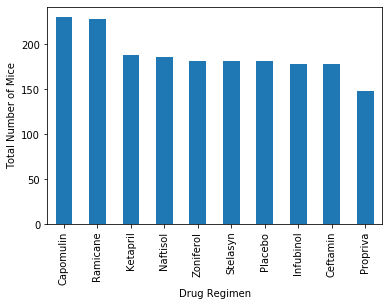

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugRegimen = cleaned_df.groupby(["Drug Regimen"])
totalMice = drugRegimen["Mouse ID"].count()
totalMice = totalMice.sort_values(ascending=False)

totalMiceBar = totalMice.plot(kind='bar').set(xlabel = "Drug Regimen", ylabel = "Total Number of Mice")



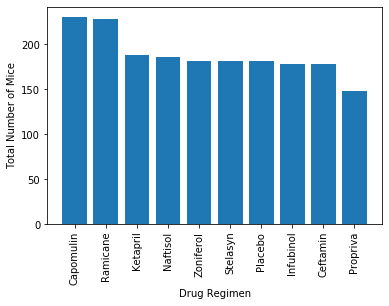

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(totalMice.index, totalMice)

plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")

plt.xticks(rotation=90) 

plt.show()


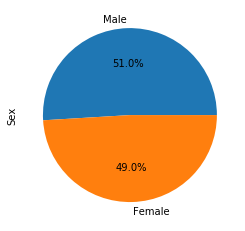

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
miceSex = cleaned_df.groupby("Sex").count()["Timepoint"].sort_values(ascending=False)

miceSexPlot = miceSex.plot(kind="pie", autopct='%1.1f%%').set(ylabel = "Sex")


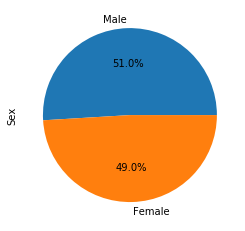

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(miceSex, labels=["Male", "Female"], autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp = mouse_data.groupby('Mouse ID')['Timepoint'].max()
# Final Timepoint is always the last duplicate, used drop_duplicates to simplify.
final_tumor_volume = mouse_data.drop_duplicates(subset=["Mouse ID"], keep="last")
final_tumor_volume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

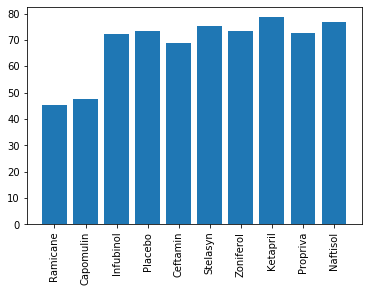

In [36]:
# Average Final Tumor Volume by Drug Regimen
plt.bar(final_tumor_volume['Drug Regimen'], final_tumor_volume['Tumor Volume (mm3)'])
plt.xticks(rotation=90)


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
treatments_data = []


for treatment in treatments:
    tempTreatment = final_tumor_volume.loc[final_tumor_volume['Drug Regimen']==treatment,'Tumor Volume (mm3)']
    treatments_data.append(tempTreatment)
    
    quartiles = tempTreatment.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = tempTreatment.loc[(tempTreatment < lower_bound) | (tempTreatment > upper_bound)]
    print(f"{treatment}'s potential outliers: {outlier}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


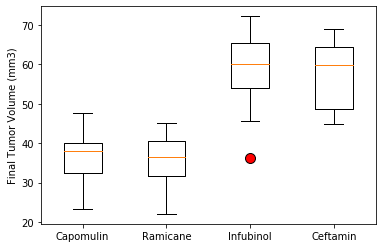

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(treatments_data, labels=treatments, flierprops=dict(markerfacecolor='r', markersize=10))
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

In [16]:
myMouseCapomulin = mouse_data.loc[mouse_data['Mouse ID']=="l509"]
myMouseCapomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


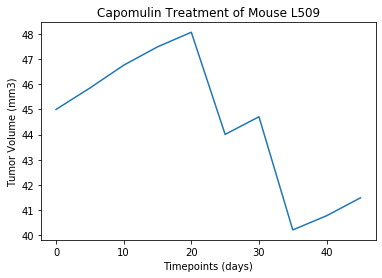

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.plot(myMouseCapomulin['Timepoint'], myMouseCapomulin['Tumor Volume (mm3)'])
plt.xlabel("Timepoints (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse L509")
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

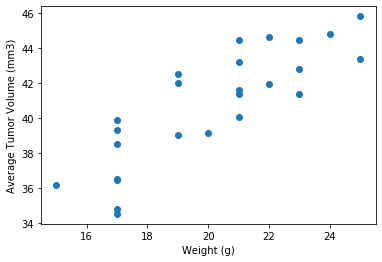

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouseCapomulin = mouse_data.loc[mouse_data["Drug Regimen"]=="Capomulin"]
mouseCapomulin_cleaned = mouseCapomulin.groupby(by='Mouse ID')[["Tumor Volume (mm3)", "Weight (g)"]].mean()
plt.scatter(mouseCapomulin_cleaned["Weight (g)"], mouseCapomulin_cleaned["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

In [19]:
mouseCapomulin_cleaned.head()

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22


(0.8419363424694717, 1.322572243471279e-07)

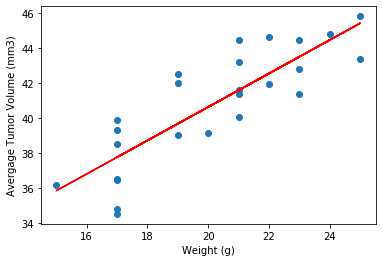

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse average weight and average tumor volume for the Capomulin regimen
m_slope, m_int, _, _, _ = st.linregress(mouseCapomulin_cleaned['Weight (g)'], mouseCapomulin_cleaned["Tumor Volume (mm3)"])
fct_volume = []

for weight in mouseCapomulin_cleaned['Weight (g)']:
    fct_volume.append(m_slope*weight + m_int)

statistics = st.pearsonr(mouseCapomulin_cleaned["Weight (g)"],mouseCapomulin_cleaned["Tumor Volume (mm3)"])
plt.scatter(mouseCapomulin_cleaned["Weight (g)"], mouseCapomulin_cleaned["Tumor Volume (mm3)"])
plt.plot(mouseCapomulin_cleaned["Weight (g)"],fct_volume, color="red");
plt.ylabel("Avergage Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
statistics